# Model Selection using RFE (Housing Case Study)

In [1]:
# import required libraries and understand the data 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 

# Reading the data 

In [3]:
housing = pd.read_csv('Housing.csv')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
housing.shape

(545, 13)

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [8]:
plt.figure(figsize= (10,12))
sns.pairplot(housing)

# Converting categorical vars to numeric vars 
- binary categorical vars(yes and no) to 1s and 0s
- craeting dummy vars for non binary vars 

In [9]:
# create a list to store vars with yes and no 
varlist = ['mainroad','guestroom', 'basement', 'hotwaterheating','airconditioning', 'prefarea']
housing[varlist] = housing[varlist].apply(lambda x: x.map({'yes':1,'no':0}))

In [10]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [11]:
#dummy vars for furnishing status 
fstatus = pd.get_dummies(housing['furnishingstatus'], drop_first = True)
fstatus = fstatus.astype(int)

In [12]:
# merge the two dataframes 
housing = pd.concat([housing, fstatus], axis = 1)

In [13]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [14]:
# drop the furnishing status column to prevent redundancy 
housing = housing.drop('furnishingstatus', axis = 1)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


# Feature scaling 

In [15]:
# split the dataset 
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

df_train , df_test = train_test_split(housing, train_size = 0.70, random_state = 100) 

In [16]:
# scaling the vars using normalization 
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
num_vars = ['price', 'area','bedrooms','bathrooms','stories','parking']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [17]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.260333,0.288710,0.386352,0.136483,0.268591,0.855643,0.170604,0.351706,0.052493,0.299213,0.242345,0.233596,0.414698,0.325459
std,0.157607,0.181420,0.147336,0.237325,0.295001,0.351913,0.376657,0.478131,0.223313,0.458515,0.285933,0.423674,0.493318,0.469162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.155227,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.221212,0.234424,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.345455,0.398099,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [19]:
# split the training data into X and y 
y_train = df_train.pop('price')
X_train = df_train
print("X_train : ", X_train.columns)
print("y_train : ",y_train)

X_train :  Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'semi-furnished', 'unfurnished'],
      dtype='object')
y_train :  359    0.169697
19     0.615152
159    0.321212
35     0.548133
28     0.575758
         ...   
526    0.048485
53     0.484848
350    0.175758
79     0.424242
520    0.060606
Name: price, Length: 381, dtype: float64


# Building Linear regression model using automated feature selection(RFE) 

In [20]:
from sklearn.feature_selection import RFE 
lm = LinearRegression()
lm.fit(X_train , y_train)

# running rfe with output no. of var = 10
rfe = RFE(estimator =lm, n_features_to_select=10)
rfe = rfe.fit( X_train, y_train)

In [21]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('area', True, 1),
 ('bedrooms', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', True, 1),
 ('guestroom', True, 1),
 ('basement', False, 3),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 4),
 ('unfurnished', False, 2)]

In [22]:
col = X_train.columns[rfe.support_]
col

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea'],
      dtype='object')

In [23]:
X_train.columns[~rfe.support_]

Index(['basement', 'semi-furnished', 'unfurnished'], dtype='object')

In [24]:
X_train_rfe = X_train[col]

In [25]:
# build the model 
X_train_rfe = sm.add_constant(X_train_rfe)
lm_1 = sm.OLS (y_train,X_train_rfe).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     74.89
Date:                Sat, 12 Jul 2025   Prob (F-statistic):           1.28e-82
Time:                        18:28:34   Log-Likelihood:                 374.65
No. Observations:                 381   AIC:                            -727.3
Df Residuals:                     370   BIC:                            -683.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0027      0.018      0.151      0.880      -0.033       0.038
area                0.2363      0.030      7.787      0.000       0.177       0.296
bedrooms            0.0661      0.037      1.794      0.074      -0.006       0.139
bathrooms           0.1982      0.022      8.927      0.000       0.155       0.242
stories             0.0977      0.019      5.251      0.000       0.061       0.134
mainroad            0.0556      0.014      3.848      0.000       0.027       0.084
guestroom           0.0381      0.013      2.934      0.004       0.013       0.064
hotwaterheating     0.0897      0.022      4.104      0.000       0.047       0.133
airconditioning     0.0711      0.011      6.235      0.000       0.049       0.093
parking             0.0637      0.018      3.488      0.001       0.028       0.100
prefarea            0.0643      0.012      5.445      0.000       0.041       0.088
==============================================================================
Omnibus:                       86.105   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              286.069
Skew:                           0.992   Prob(JB):                     7.60e-63
Kurtosis:                       6.753   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

now check the p alue for all the vars and drop the var with high p value mannually 

In [26]:
X_train_new = X_train_rfe.drop('bedrooms', axis = 1 )
X_train_new.head()

,const,area,bathrooms,stories,mainroad,guestroom,hotwaterheating,airconditioning,parking,prefarea
359,1.0,0.155227,0.0,0.000000,1,0,0,0,0.333333,0
19,1.0,0.403379,0.5,0.333333,1,0,0,1,0.333333,1
159,1.0,0.115628,0.5,0.000000,1,1,0,1,0.000000,0
35,1.0,0.454417,0.5,1.000000,1,0,0,1,0.666667,0
28,1.0,0.538015,0.5,0.333333,1,0,1,0,0.666667,0


# Rebuild the model 

In [27]:
X_train_lm = sm.add_constant(X_train_new)
lm_2 = sm.OLS(y_train,X_train_lm).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     82.37
Date:                Sat, 12 Jul 2025   Prob (F-statistic):           6.67e-83
Time:                        18:28:35   Log-Likelihood:                 373.00
No. Observations:                 381   AIC:                            -726.0
Df Residuals:                     371   BIC:                            -686.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0242      0.013      1.794      0.074      -0.002       0.051
area                0.2367      0.030      7.779      0.000       0.177       0.297
bathrooms           0.2070      0.022      9.537      0.000       0.164       0.250
stories             0.1096      0.017      6.280      0.000       0.075       0.144
mainroad            0.0536      0.014      3.710      0.000       0.025       0.082
guestroom           0.0390      0.013      2.991      0.003       0.013       0.065
hotwaterheating     0.0921      0.022      4.213      0.000       0.049       0.135
airconditioning     0.0710      0.011      6.212      0.000       0.049       0.094
parking             0.0669      0.018      3.665      0.000       0.031       0.103
prefarea            0.0653      0.012      5.513      0.000       0.042       0.089
==============================================================================
Omnibus:                       91.542   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              315.402
Skew:                           1.044   Prob(JB):                     3.25e-69
Kurtosis:                       6.938   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
X_train_lm.columns

Index(['const', 'area', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea'],
      dtype='object')

In [29]:
X_train_new.drop(['const'], axis =1 , inplace= True)

In [30]:
# calculate the VIFs for the new model 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_new
vif['features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF'] = vif['VIF'].round(2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
0,area,4.52
3,mainroad,4.26
2,stories,2.12
7,parking,2.10
6,airconditioning,1.75
1,bathrooms,1.58
8,prefarea,1.47
4,guestroom,1.30
5,hotwaterheating,1.12


In [31]:
y_train_pred = lm_2.predict(X_train_lm)

# Residual analysis 

<Figure size 1000x1200 with 0 Axes>

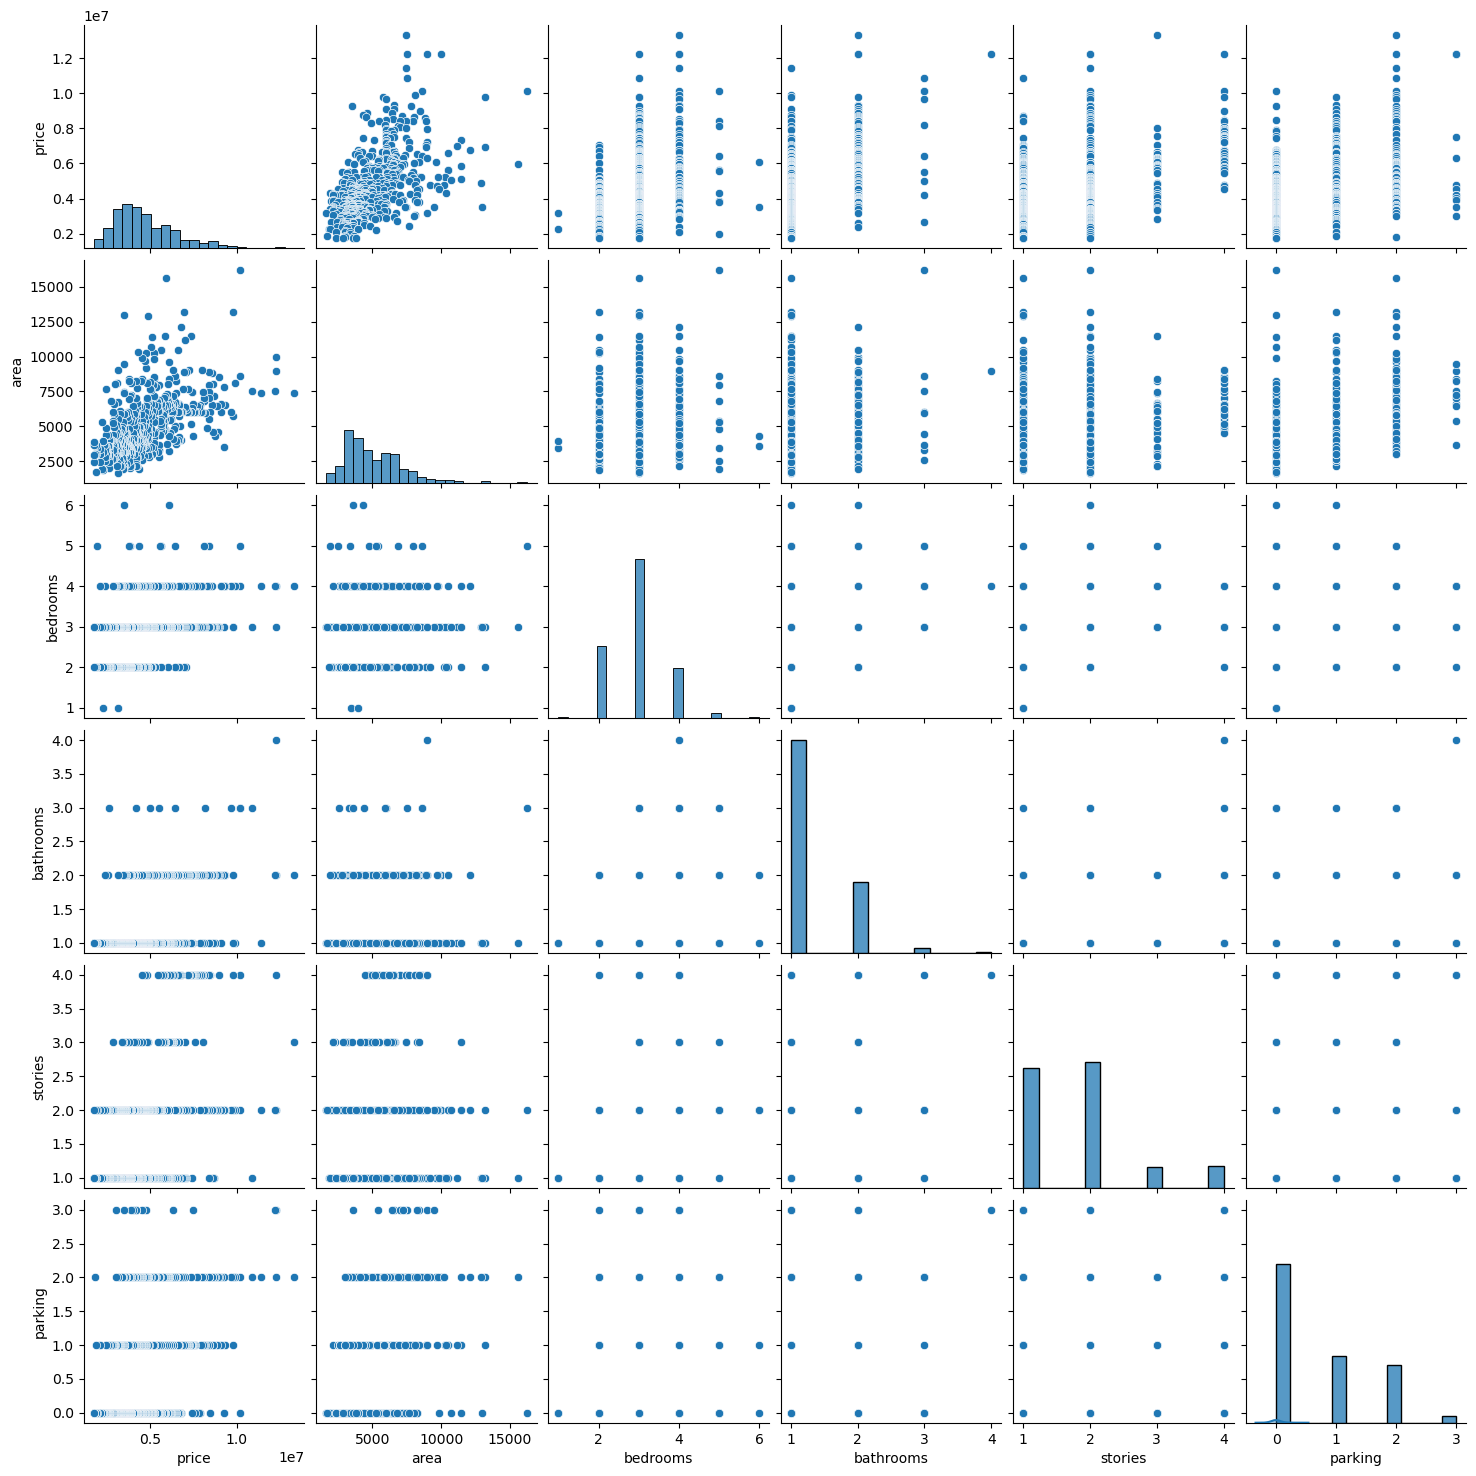

In [32]:
# plot the historgram to check wheter the error terms are distributed normally 
sns.distplot(y_train - y_train_pred)
plt.xlabel("ERROR TERMS")
plt.show()

# Prediction 

In [33]:
# transform the values using scaler fit used for training set 
num_vars = ['price', 'area','bedrooms','bathrooms','stories','parking']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [34]:
# split the testing data into X and y 
y_test = df_test.pop('price')
X_test = df_test 
X_test.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'semi-furnished', 'unfurnished'],
      dtype='object')

In [35]:
df_test.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [36]:
# make prediction on the transformed testing data 
X_test_new = X_test[X_train_new.columns]
X_test_new = sm.add_constant(X_test_new)

In [37]:
# predict the prices (y_test_pred) using X_test 
y_test_pred = lm_2.predict(X_test_new)

# Model evaluation

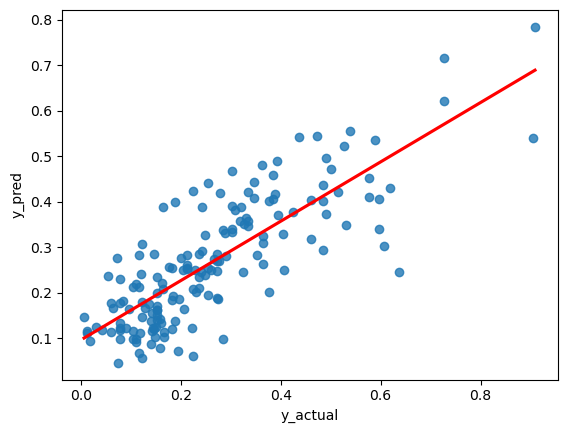

In [38]:
sns.regplot(x=y_test,y= y_test_pred, ci = None, line_kws={'color':'red'} )
plt.ylabel('y_pred')
plt.xlabel('y_actual')
plt.show()

In [39]:
from sklearn.metrics import r2_score
r2 = r2_score(y_true = y_test , y_pred = y_test_pred)
print(f"The value of R-square : {r2}")

The value of R-square : 0.6481740917926484
